## This Notebook gives us an Idea of how to carry out Exploratory Data Analysis, build classification Models and Tune the Models to predict the Quality of the Wine given the Physicochemical properties. This is a binary classification problem. 

In [360]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [361]:
# Loading the Data
Data = pd.read_csv('winequality-red.csv')

In [362]:
Data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [363]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [364]:
Data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [365]:
# Univariate Analysis of the Target variable 'quality'

In [366]:
#descriptive Statistics summary
Data['quality'].describe()

count    1599.000000
mean        5.636023
std         0.807569
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         8.000000
Name: quality, dtype: float64

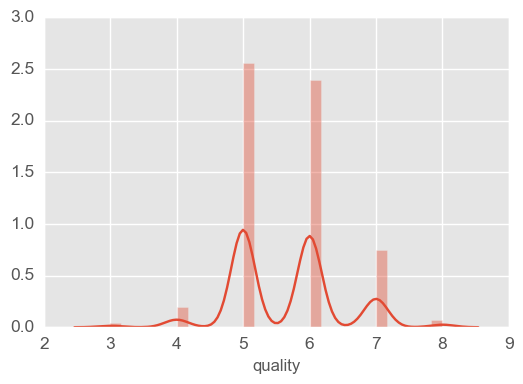

In [367]:
# Histogram
sns.distplot(Data['quality']);

In [368]:
# Skweness and Kurtosis
print('Skewness: %.2f'%Data['quality'].skew())
print('Kurtosis: %.2f'% Data['quality'].kurt())

Skewness: 0.22
Kurtosis: 0.30


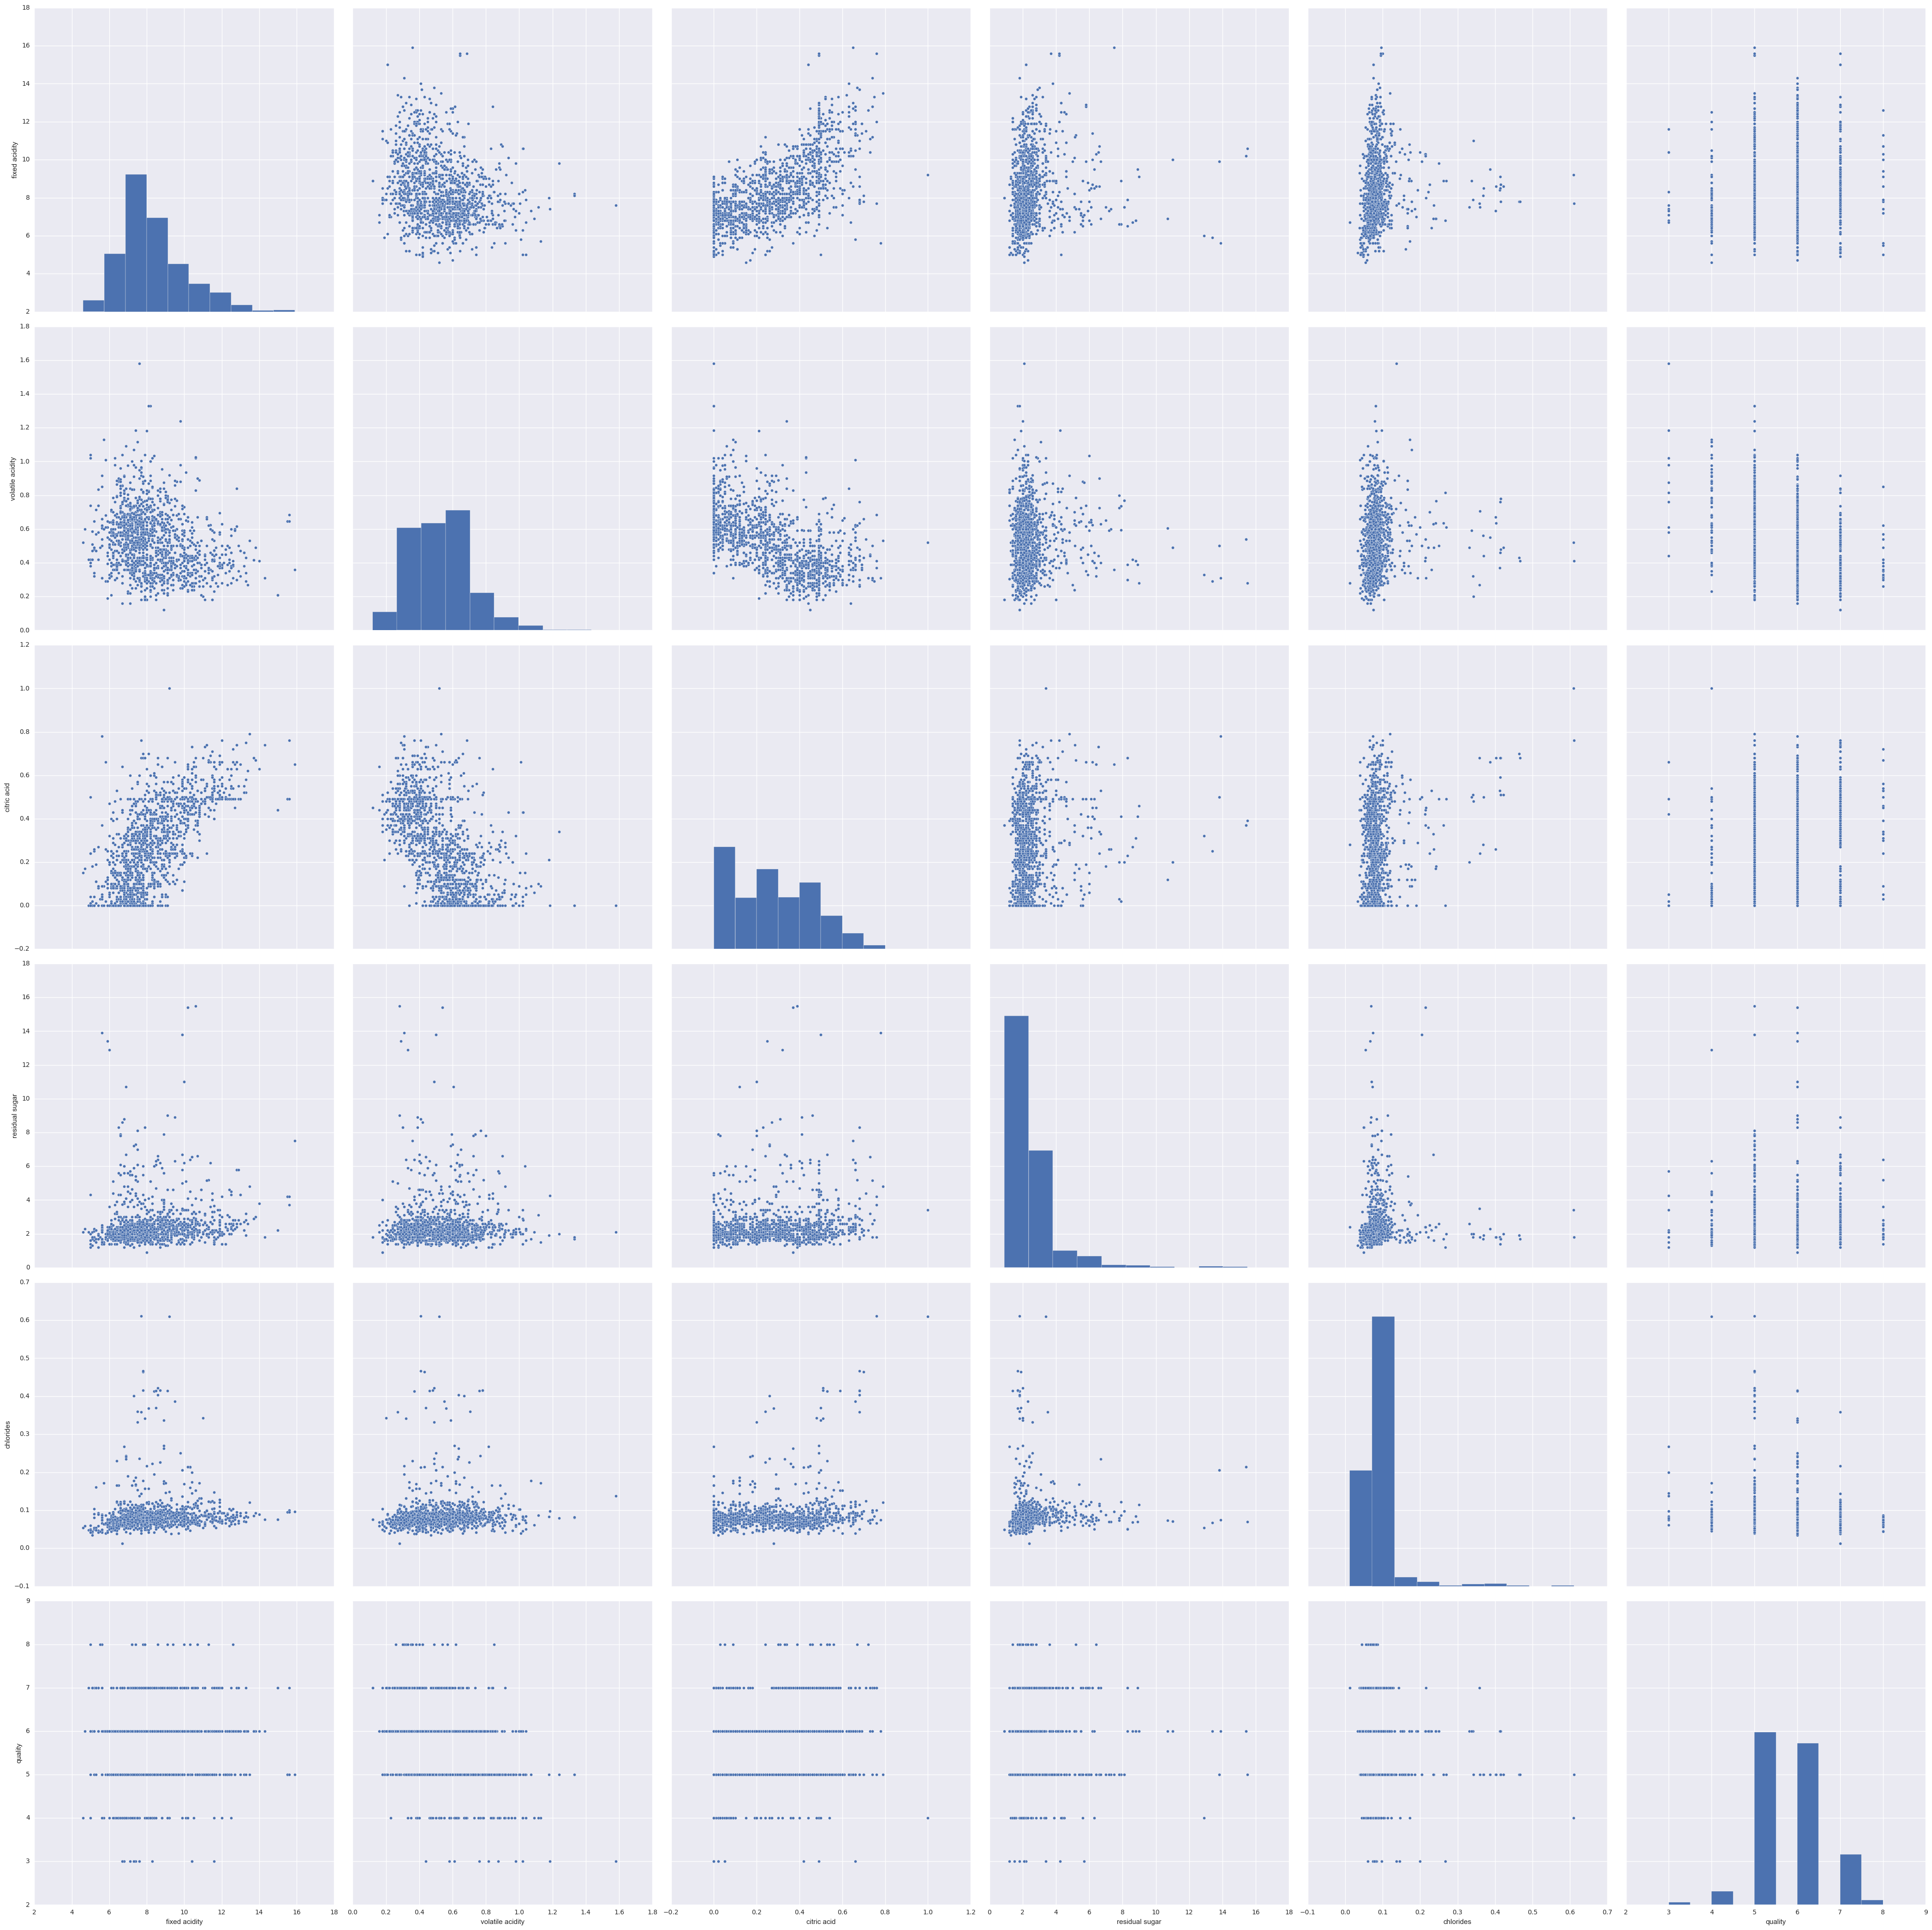

In [370]:
#Pair Plot
sns.set()
columns = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides',  'quality']
sns.pairplot(Data[columns], size = 7)
plt.show();

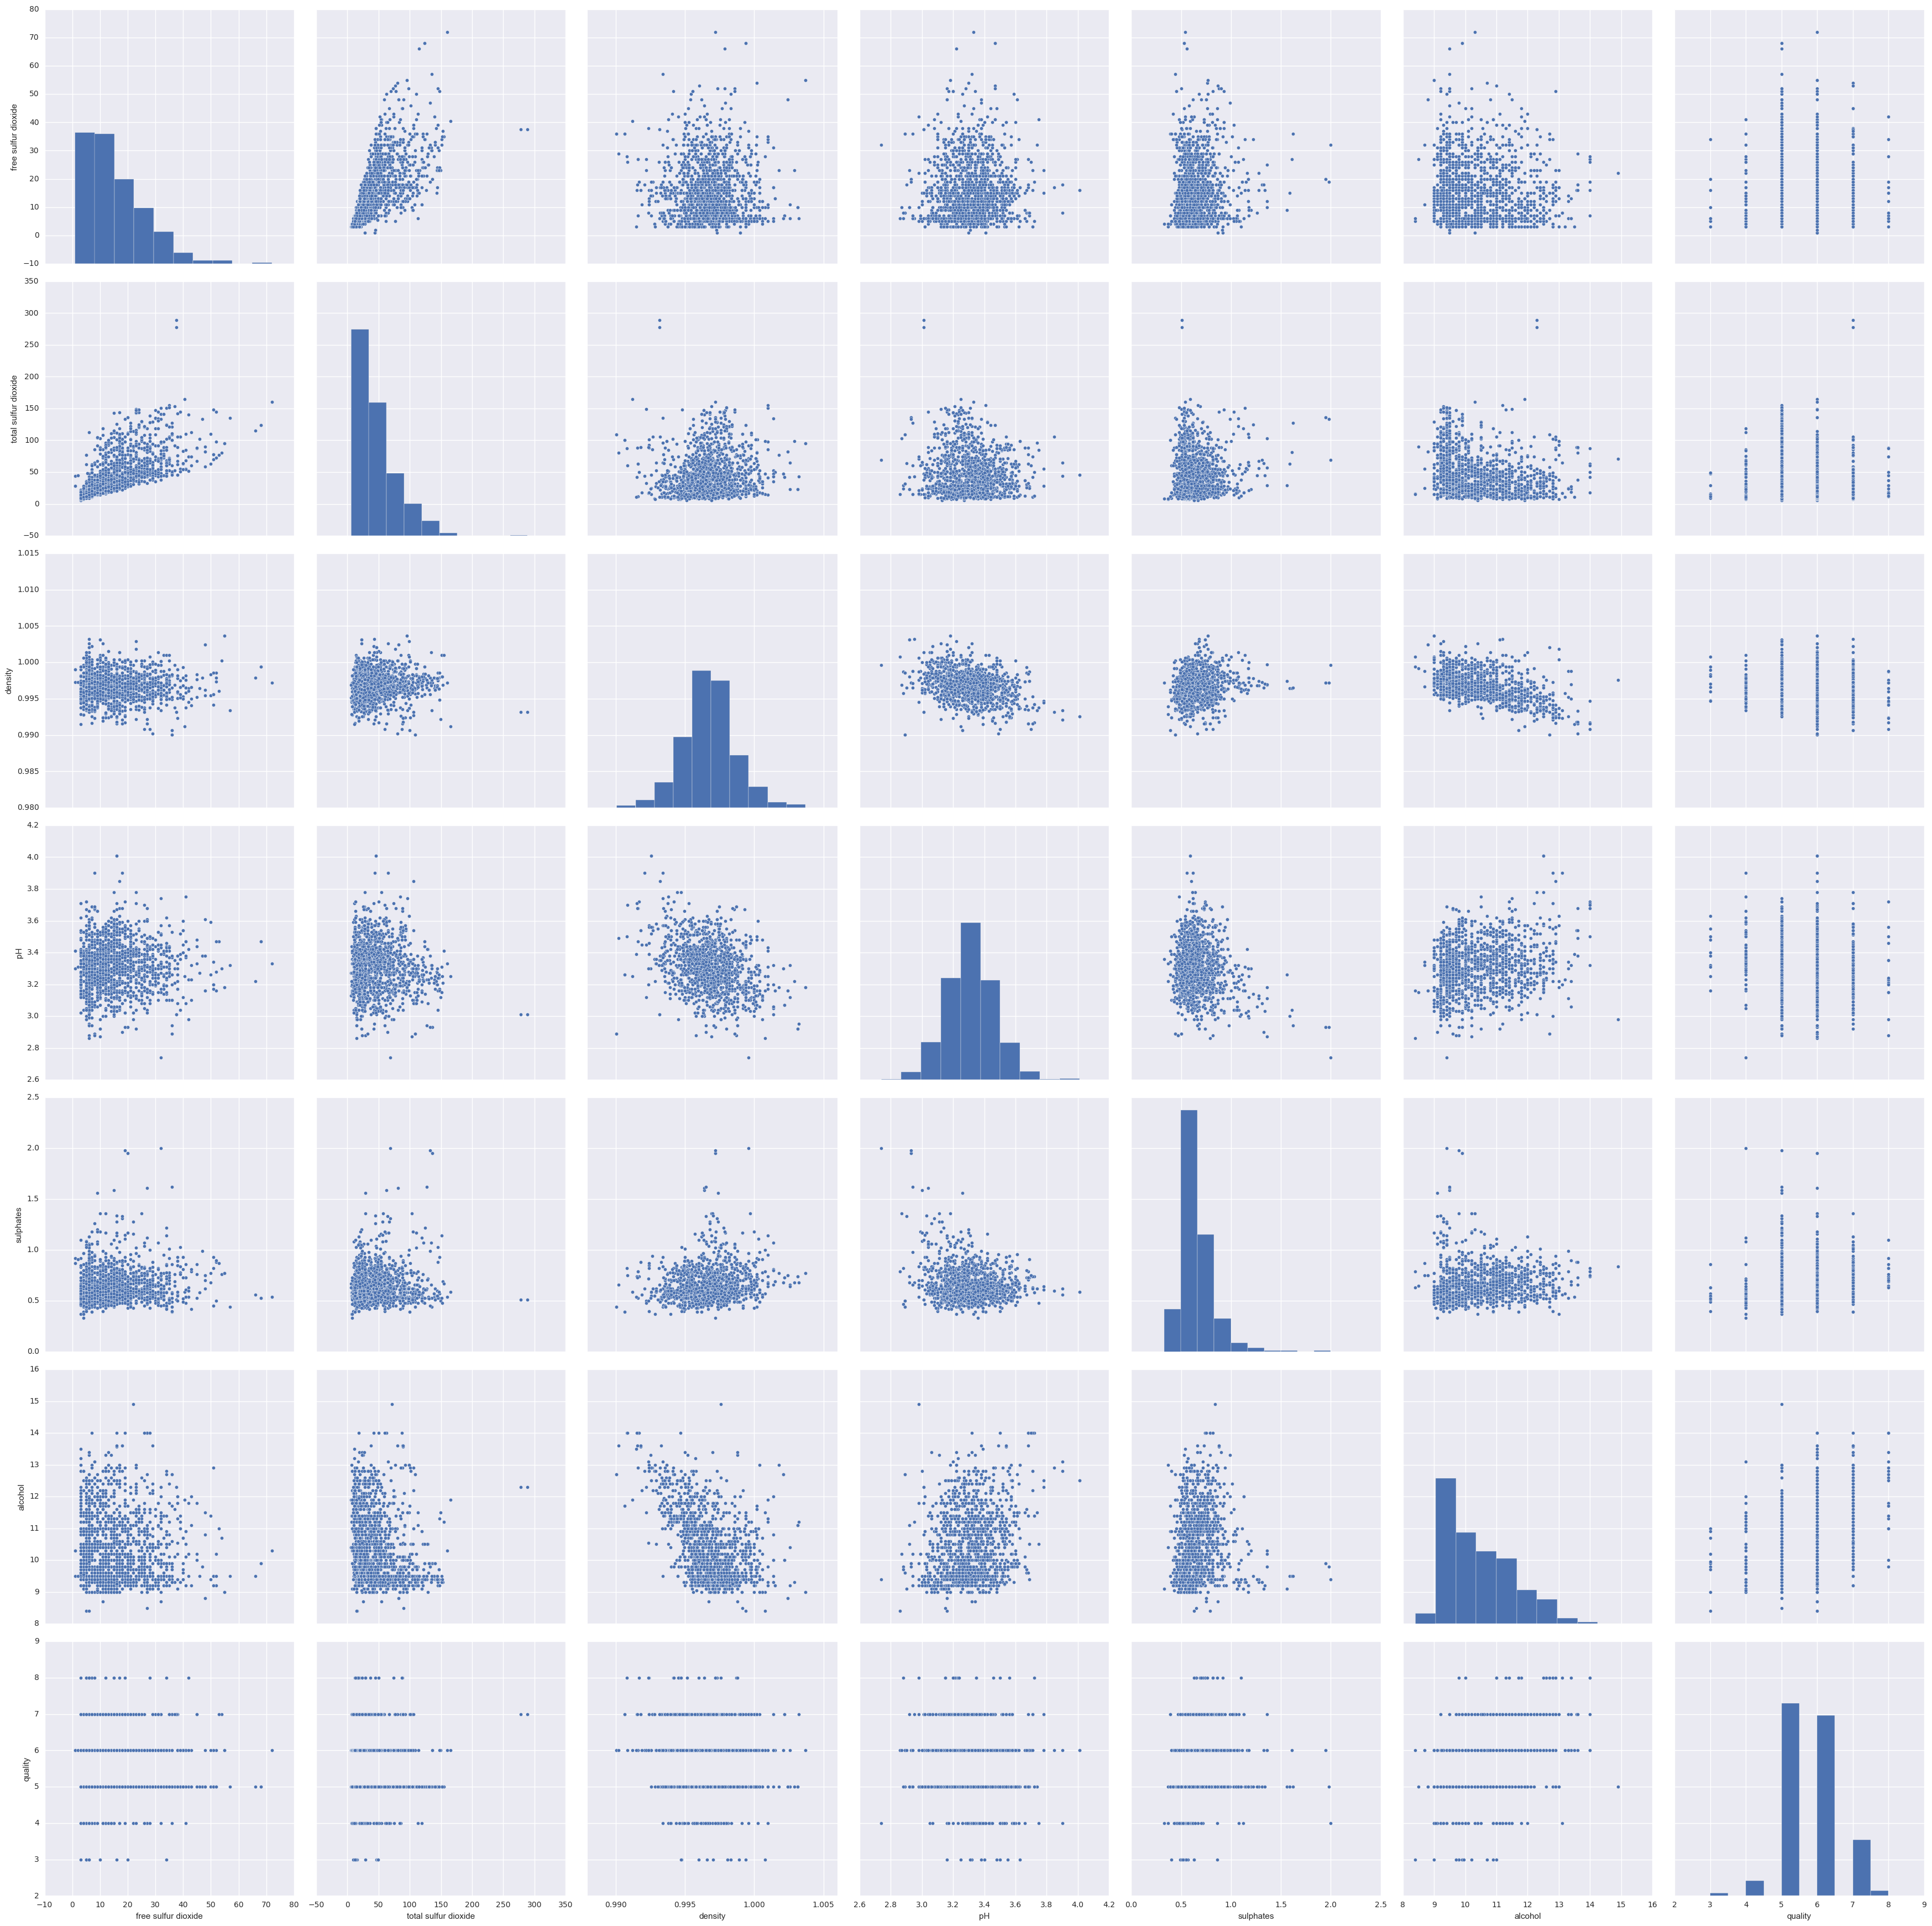

In [371]:
sns.set()
cols = ['free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality']
sns.pairplot(Data[cols], size = 5)
plt.plot();


In [453]:
# Bi-Variate Analysis of Quality with each variable

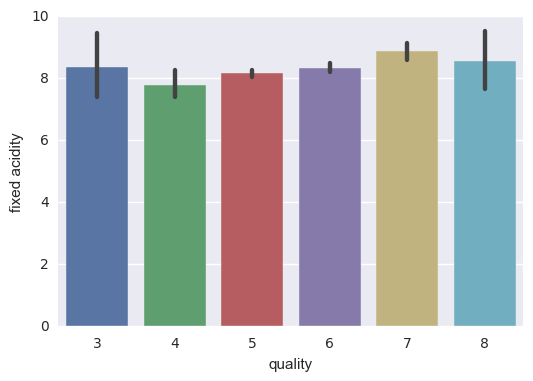

In [372]:
#Here we see that fixed acidity does not give any specification to classify the quality.
fig = plt.figure(figsize = (6,4))
sns.barplot(x = 'quality', y = 'fixed acidity', data = Data)


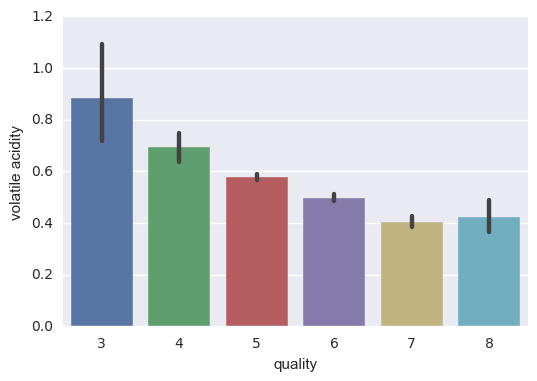

In [373]:
#Here we see that its quite a downing trend in the volatile acidity as we go higher the quality 
fig = plt.figure(figsize = (6,4))
sns.barplot(x = 'quality', y = 'volatile acidity', data = Data)

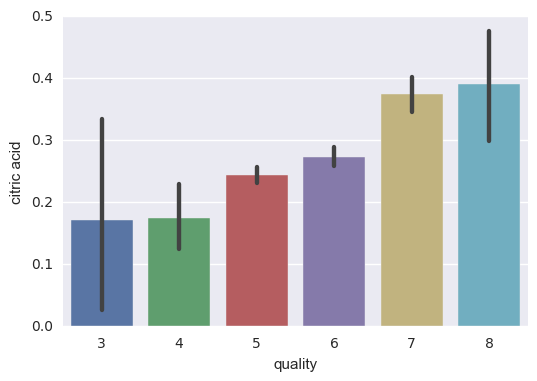

In [374]:
# AS the citric acid level goes up the Quality gets better
fig = plt.figure(figsize=(6,4))
sns.barplot(x = 'quality', y = 'citric acid', data= Data)

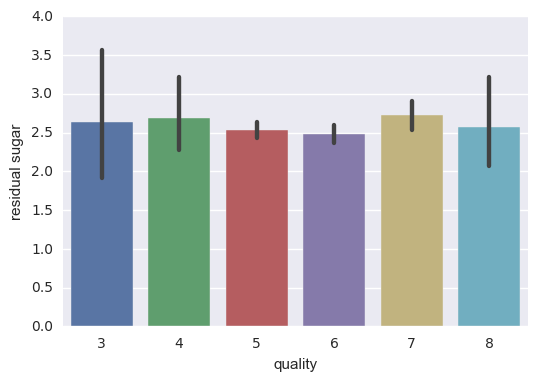

In [375]:
#Quality vs Residual Sugar
fig = plt.figure(figsize = (6,4))
sns.barplot(x = 'quality', y = 'residual sugar', data = Data)

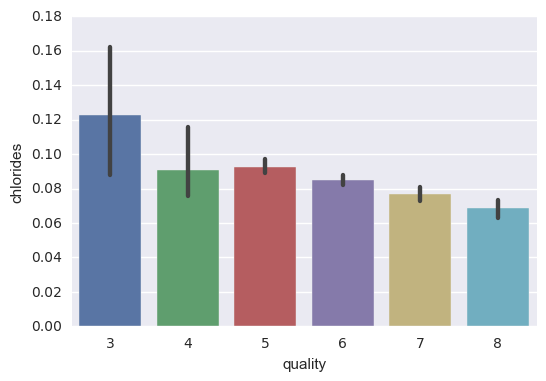

In [376]:
#Composition of chloride also go down as we go higher in the quality of the wine
fig = plt.figure(figsize = (6,4))
sns.barplot(x = 'quality', y = 'chlorides', data = Data)

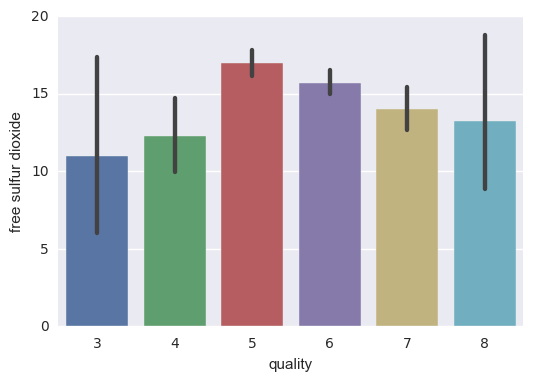

In [377]:
#Quality Vs free sulfur dioxide
fig = plt.figure(figsize = (6,4))
sns.barplot(x = 'quality', y = 'free sulfur dioxide', data = Data)

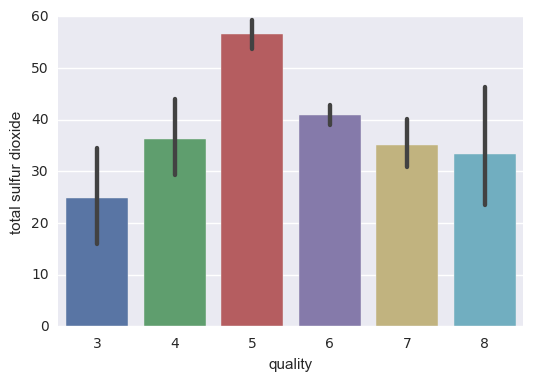

In [378]:
#Quality Vs total sulfur dioxide
fig = plt.figure(figsize = (6,4))
sns.barplot(x = 'quality', y = 'total sulfur dioxide', data = Data)

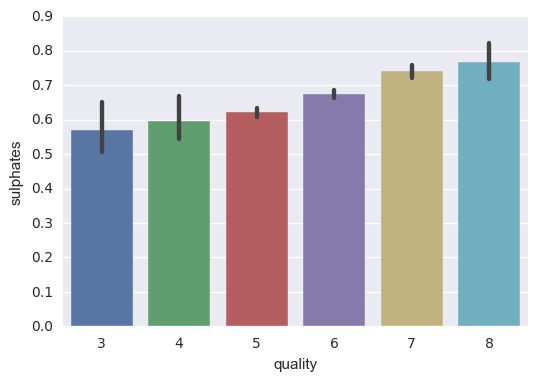

In [379]:
#Sulphates level goes higher with the quality of wine
fig = plt.figure(figsize = (6,4))
sns.barplot(x = 'quality', y = 'sulphates', data = Data)

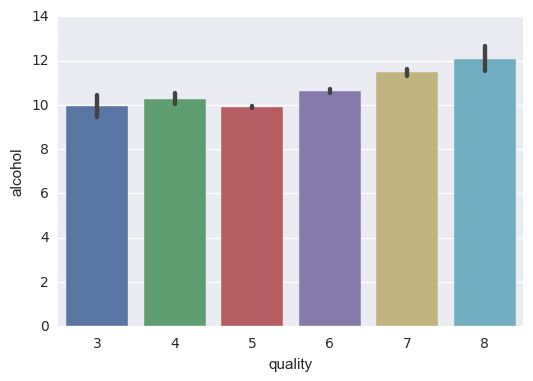

In [380]:
#Alcohol level also goes higher as te quality of wine increases
fig = plt.figure(figsize = (6,4))
sns.barplot(x = 'quality', y = 'alcohol', data = Data)

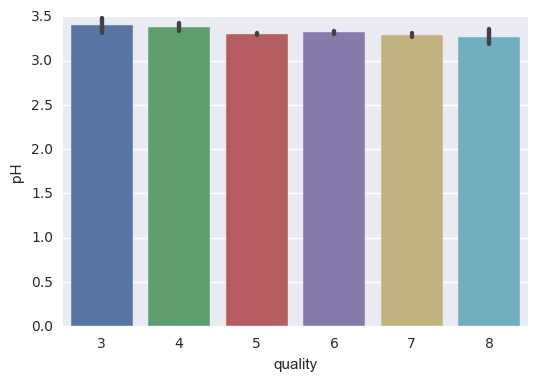

In [382]:
#Quality Vs pH
fig = plt.figure(figsize = (6,4))
sns.barplot(x = 'quality', y = 'pH', data = Data)

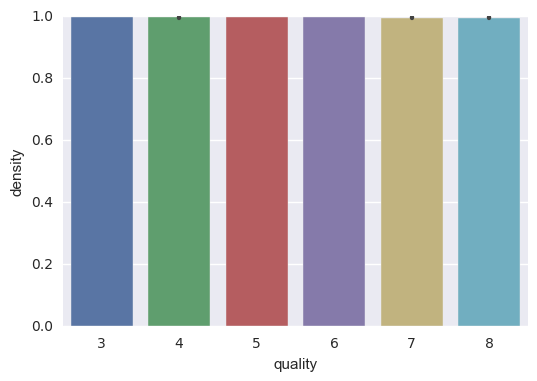

In [383]:
#Quality Vs Density
fig = plt.figure(figsize = (6,4))
sns.barplot(x = 'quality', y = 'density', data = Data)

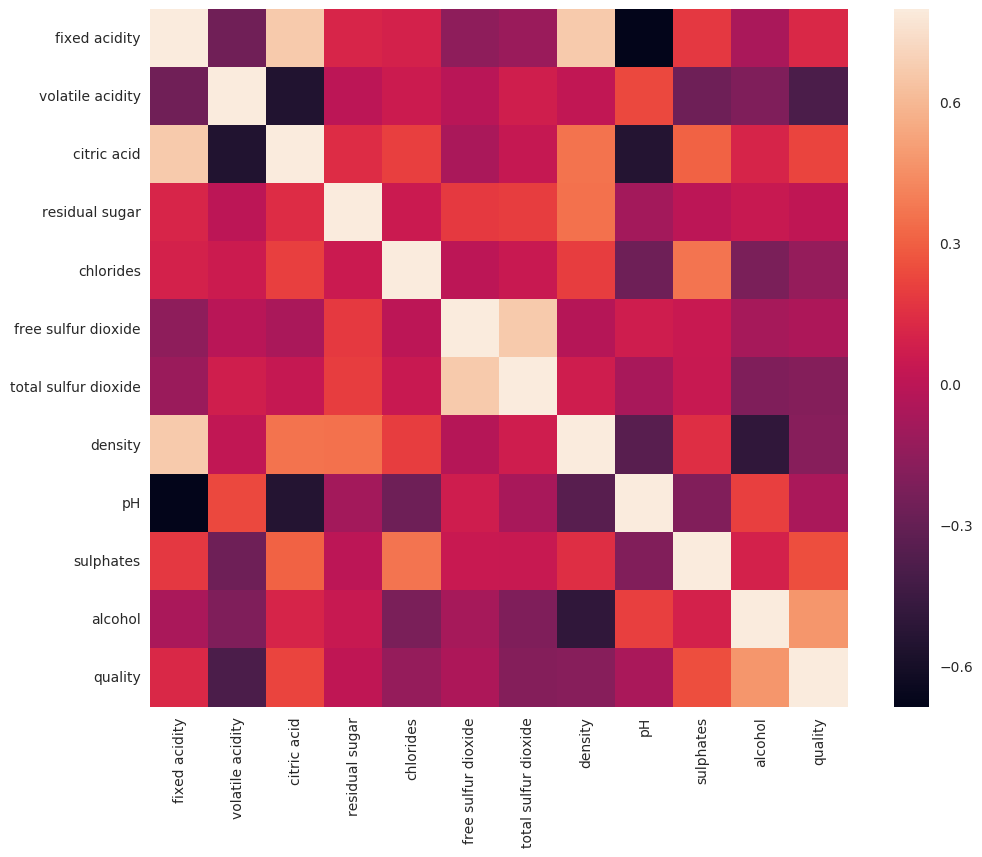

In [386]:
#Correlation matrix (heatmap style)
#correlation matrix
corrmat = Data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

In [387]:
#Zoomed Heatmap

In [388]:
import numpy as np

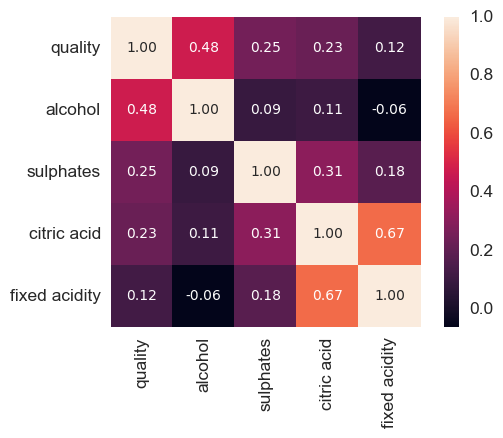

In [389]:
k = 5 #TOP CORRELATED VARIABLES WITH 'quality'
cols = corrmat.nlargest(k, 'quality')['quality'].index
cm = np.corrcoef(Data[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

We see that Quality has a positive correalation with Alcohol, Sulphates, citirc acid, fixed acidity 

In [390]:
#Missing Data

In [391]:
total = Data.isnull().sum().sort_values(ascending = False)
percent = (Data.isnull().sum()/Data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total,percent], axis = 1,keys=['Total', 'Percent'])
print(missing_data)

                      Total  Percent
quality                   0      0.0
alcohol                   0      0.0
sulphates                 0      0.0
pH                        0      0.0
density                   0      0.0
total sulfur dioxide      0      0.0
free sulfur dioxide       0      0.0
chlorides                 0      0.0
residual sugar            0      0.0
citric acid               0      0.0
volatile acidity          0      0.0
fixed acidity             0      0.0


In [454]:
# If the Quality is in the range of 2 to 6.5 we label it as 'Bad Quality wine' indicated by 0
# If the Quality is in the range of 6.5 to 8 we label it as 'Good Quality wine' indicated by 1

In [392]:
bins = (2,6.5,8)
group_names = [0,1]
Data['quality'] = pd.cut(Data['quality'], bins = bins, labels=group_names)

In [393]:
Data['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

In [394]:
# Feature Importance

In [395]:
from sklearn.ensemble import RandomForestRegressor
## Importing all the necessary libraries for visualization and feature importance
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.feature_selection import RFE, f_regression
from sklearn.linear_model import (LinearRegression, Ridge, Lasso, RandomizedLasso)
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor

In [455]:
# Normalization using MinMax Scaler

In [396]:
x = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']


scale = MinMaxScaler()
Data[x] = scale.fit_transform(Data[x])

In [400]:
X = Data[x]
Y = Data['quality']

In [313]:
#### Determining the Feature Importance using various Techniques

In [401]:
import numpy as np
ranks = {}
# Create our function which stores the feature rankings to the ranks dictionary
def ranking(ranks, names, order=1):
    minmax = MinMaxScaler()
    ranks = minmax.fit_transform(order*np.array([ranks]).T).T[0]
    ranks = map(lambda x: round(x,2), ranks)
    return dict(zip(names, ranks))

In [402]:
## 1) Stability Selection via Randomized Lasso

In [403]:
rlasso = RandomizedLasso(alpha=0.01)
rlasso.fit(X, Y)
ranks["rlasso/Stability"] = ranking(np.abs(rlasso.scores_), colnames)
print('finished')

finished


C:\Users\Shrinivas Kallol\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class RandomizedLasso is deprecated; The class RandomizedLasso is deprecated in 0.19 and will be removed in 0.21.
  warnings.warn(msg, category=DeprecationWarning)


In [404]:
## 2) Recursive Feature Elimination ( RFE )

In [405]:
lr = LinearRegression(normalize=True)
lr.fit(X,Y)
#stop the search when only the last feature is left
rfe = RFE(lr, n_features_to_select=1, verbose =3 )
rfe.fit(X,Y)
ranks["RFE"] = ranking(list(map(float, rfe.ranking_)), colnames, order=-1)

Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.
Fitting estimator with 2 features.


In [406]:
## 3) Linear Model Feature Ranking

In [407]:
lr = LinearRegression(normalize=True)
lr.fit(X,Y)
ranks["LinReg"] = ranking(np.abs(lr.coef_), colnames)

# Using Ridge 
ridge = Ridge(alpha = 7)
ridge.fit(X,Y)
ranks['Ridge'] = ranking(np.abs(ridge.coef_), colnames)

# Using Lasso
lasso = Lasso(alpha=.05)
lasso.fit(X, Y)
ranks["Lasso"] = ranking(np.abs(lasso.coef_), colnames)

In [408]:
## 4) Random Forest feature ranking

In [409]:
rf = RandomForestRegressor(n_jobs=-1, n_estimators=100, verbose=3)
rf.fit(X,Y)
ranks["RF"] = ranking(rf.feature_importances_, colnames);

building tree 1 of 100building tree 2 of 100
building tree 3 of 100
building tree 4 of 100

building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished


In [410]:
## Creating the Feature Ranking Matrix


In [411]:
r = {}
for name in colnames:
    r[name] = round(np.mean([ranks[method][name] 
                             for method in ranks.keys()]), 2)
methods = sorted(ranks.keys())
ranks["Mean"] = r
methods.append("Mean")
 
print("\t%s" % "\t".join(methods))
for name in colnames:
    print("%s\t%s" % (name, "\t".join(map(str, 
                         [ranks[method][name] for method in methods]))))

	Lasso	LinReg	RF	RFE	Ridge	rlasso/Stability	Mean
fixed acidity	0.0	0.64	0.02	0.6	0.25	0.0	0.25
volatile acidity	0.0	0.42	0.25	0.9	0.42	0.0	0.33
citric acid	0.0	0.11	0.01	0.2	0.18	0.0	0.08
residual sugar	0.0	0.61	0.06	0.4	0.24	0.0	0.22
chlorides	0.0	0.66	0.03	0.7	0.32	0.0	0.29
free sulfur dioxide	0.0	0.03	0.02	0.1	0.0	0.0	0.03
total sulfur dioxide	0.0	0.29	0.15	0.3	0.22	0.0	0.16
density	0.0	0.85	0.01	0.5	0.39	0.0	0.29
pH	0.0	0.0	0.0	0.0	0.03	0.0	0.0
sulphates	0.0	1.0	0.44	0.8	0.59	0.0	0.47
alcohol	0.0	0.84	1.0	1.0	1.0	0.0	0.64


In [412]:
# Put the mean scores into a Pandas dataframe
meanplot = pd.DataFrame(list(r.items()), columns= ['Feature','Mean Ranking'])

# Sort the dataframe
meanplot = meanplot.sort_values('Mean Ranking', ascending=False)

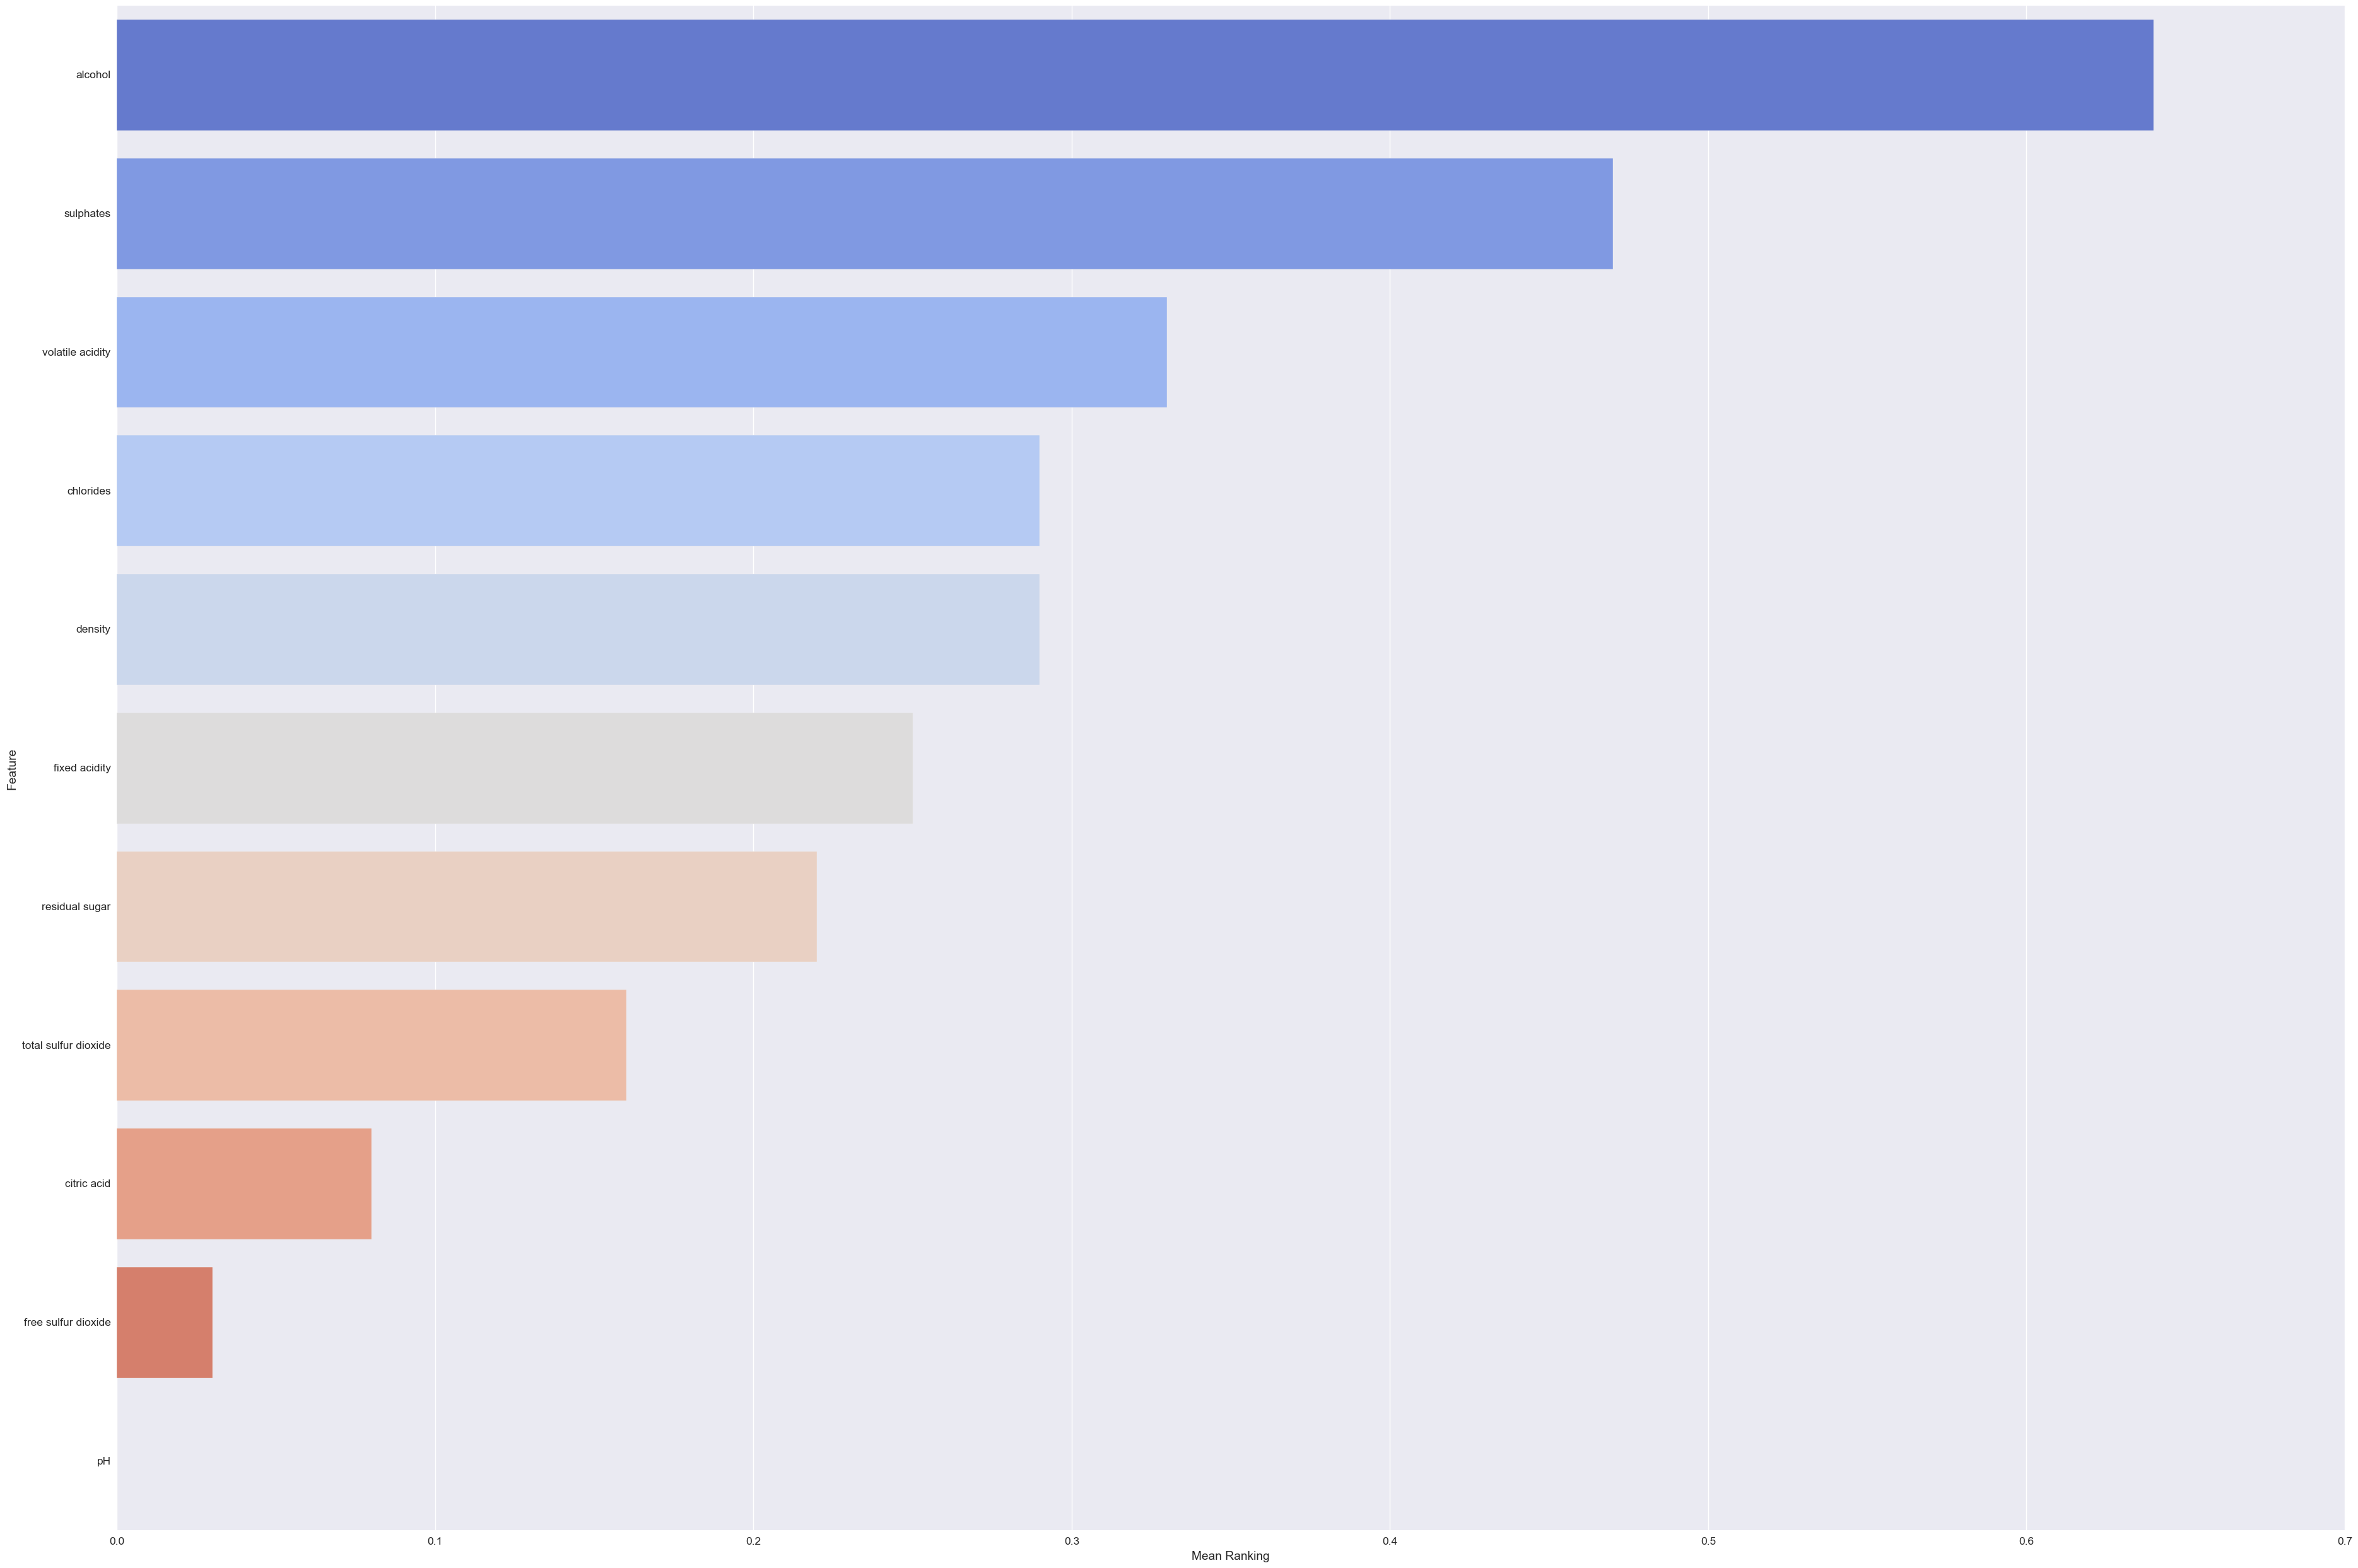

In [413]:
# Let's plot the ranking of the features
sns.factorplot(x="Mean Ranking", y="Feature", data = meanplot, kind="bar", 
               size=25, aspect=1.5, palette='coolwarm')

Using 4 different Feature importance techniques and taking the mean for each variable, we see that
Alcohol, sulphates, volatile acidity, chlorides, density (Ordered from Highest to lowest importance) are the Top 5 features out of the 11 Physicochemical features that affect the quality of the Red wine 

In [414]:
# Handling the imbalanced classes in our Data set

In [415]:
#Visualizing Label count

quality
0    1382
1     217
dtype: int64


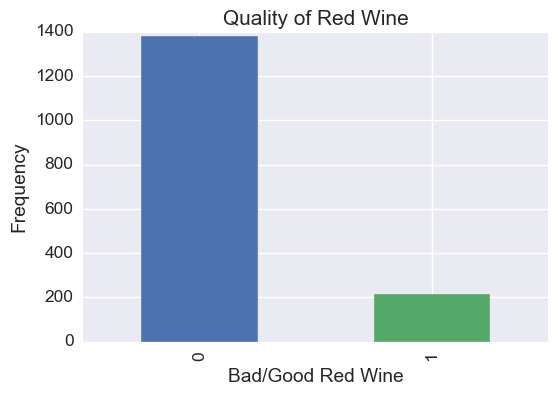

In [416]:
#count_classes = pd.value_counts(Data['quality'], sort = True).sort_index()
count_classes = pd.value_counts(Data['quality'])
count_classes.plot(kind = 'bar')
plt.title("Quality of Red Wine")
plt.xlabel('Bad/Good Red Wine')
plt.ylabel('Frequency')
split = Data.groupby(['quality']).size()
print(split)

In [417]:
#Smote to handle imbalanced Data
from imblearn.over_sampling import SMOTE
oversampler=SMOTE(random_state=99)
os_features,os_labels=oversampler.fit_sample(X,Y)

In [418]:
#Statistical Modelling

In [419]:
import numpy
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.cross_validation import KFold, cross_val_score
from sklearn.metrics import confusion_matrix,precision_recall_curve,auc,roc_auc_score,roc_curve,recall_score,classification_report, accuracy_score
from sklearn.metrics import mean_squared_error
import sklearn.cross_validation

In [420]:
# Random Forest Classifier

In [421]:
from sklearn.ensemble import RandomForestClassifier

In [457]:
rfc = RandomForestClassifier(n_estimators = 100, max_depth = 4 ,max_features = 'auto',random_state=99)

In [460]:
print ('Accuracy of Random Forest with 10 fold cross-validation technique: %.2f'%np.mean(cross_val_score(rfc, os_features, os_labels, cv=10)))

Accuracy of Random Forest with 10 fold cross-validation technique: 0.84


In [462]:
# Tuning the Hyper-parameters

In [463]:
param_grid = {
                 'n_estimators': [10, 20, 50,100],
                 'max_depth': [2, 5, 7, 9],
                    'max_features':[7,8,9,10]
    
             }

In [434]:
from sklearn.grid_search import GridSearchCV

grid_clf = GridSearchCV(rfc,param_grid, cv = 5 )
grid_clf.fit(os_features, os_labels)


GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=9, max_features=7, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=99, verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': [2, 5, 7, 9], 'n_estimators': [10, 20, 50, 100], 'max_features': [7, 8, 9, 10]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [435]:
grid_clf. best_params_
#grid_clf.best_estimator_
#grid_clf.grid_scores_

{'max_depth': 9, 'max_features': 7, 'n_estimators': 100}

In [466]:
rfc = RandomForestClassifier(n_estimators = 100, max_depth = 9 ,max_features = 7,random_state=99)

In [467]:
print ('Accuracy of Random Forest with 10 fold cross-validation technique with tuned parameters: %.2f'%np.mean(cross_val_score(rfc, os_features, os_labels, cv=10)))

Accuracy of Random Forest with 10 fold cross-validation technique with tuned parameters: 0.91


In [468]:
# We see that the accuracy of the Model increased from 0.84 to 0.91 after tuning the parameters!

In [438]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
y_pred = cross_val_predict(rfc,os_features,os_labels,cv=10)
conf_mat = confusion_matrix(os_labels,y_pred)

In [470]:
# Notice that we have to use cross_val_predict instead of cross_val_score to generate the confusion matrix when we use cross validation to Evaluate Accuracy

In [439]:
conf_mat

array([[1180,  202],
       [  40, 1342]], dtype=int64)

In [440]:
print(classification_report(os_labels,y_pred))

             precision    recall  f1-score   support

          0       0.97      0.85      0.91      1382
          1       0.87      0.97      0.92      1382

avg / total       0.92      0.91      0.91      2764



In [441]:
from sklearn.metrics import roc_curve, auc

false_positive_rate, true_positive_rate, thresholds = roc_curve(os_labels, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print ('AUC: %.2f' %roc_auc)

AUC: 0.91


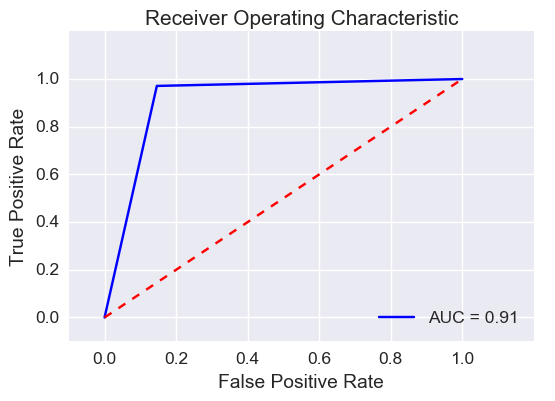

In [442]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b', label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [471]:
# Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

In [472]:
clf = GradientBoostingClassifier(n_estimators = 500, max_depth = 4,
          learning_rate = .1326, verbose=3, random_state=99)

In [476]:
print ('Accuracy of Gradient Boosting algortihm without tuning the parameters: %.2f'%np.mean(cross_val_score(clf, os_features, os_labels, cv=5)))

      Iter       Train Loss   Remaining Time 
         1           1.2470            2.50s
         2           1.1387            2.50s
         3           1.0523            2.49s
         4           0.9841            2.49s
         5           0.9264            2.43s
         6           0.8784            2.44s
         7           0.8374            2.40s
         8           0.7954            2.40s
         9           0.7600            2.41s
        10           0.7276            2.33s
        11           0.7011            2.32s
        12           0.6758            2.32s
        13           0.6561            2.31s
        14           0.6340            2.30s
        15           0.6157            2.24s
        16           0.6019            2.21s
        17           0.5843            2.34s
        18           0.5691            2.36s
        19           0.5571            2.34s
        20           0.5462            2.30s
        21           0.5354            2.31s
        2

In [477]:
# We can see that Gradient Boosting gives us an accuracy of 0.91 without even tuning the Parameters, 
# This gives us a sense of how powerful the technique is. However this Technique is compuataionally expensive. 
# We can use Randomized CV or Grid Search to tne the Hyper parameters

## Key Points
### We identified the most important Physicochemical properties Alcohol, sulphates, volatile acidity, chlorides, density (Ordered from Highest to lowest importance)using 4 different Feature Importance Techniques 
### Built Classification Models like Random Forests and Gradient Boosting and tuned the parameters for Random Forests
### We obtained Classification Accuracy of 91% using both of our classifiers